## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

Import neccessary libraries

In [2]:
data = pd.read_excel(r"C:\Users\Lenovo\Desktop\DS\Internship\Flight Price Prediction\Flight_Price_Prediction.xls")
data.head(5)

,Unnamed: 0,Airline_Name,Departure_Time,Arrival_Time,Day_of_Travel,Source,Destination,Duration,No_of_stops,Price
0,0,IndiGo,02:25,05:15,Sunday,New Delhi,Bengaluru,02 h 50 m,Non stop,"₹ 8,160"
1,1,IndiGo,03:50,06:40,Sunday,New Delhi,Bengaluru,02 h 50 m,Non stop,"₹ 8,160"
2,2,IndiGo,05:50,08:35,Sunday,New Delhi,Bengaluru,02 h 45 m,Non stop,"₹ 8,160"
3,3,Air India,06:10,08:55,Sunday,New Delhi,Bengaluru,02 h 45 m,Non stop,"₹ 7,740"
4,4,SpiceJet,06:05,09:00,Sunday,New Delhi,Bengaluru,02 h 55 m,Non stop,"₹ 8,160"


Import and Visualise the data

Here various airlines, its no. of stops, duration taken to reach the destination, etc., are taken. Using the above data, we have to predict the price of a ticket.

Target
- Price

Labels
- Airline_Name
- Departure_Time
- Arrival_Time
- Day_of_Travel
- Source
- Destination
- Duration
- No_of_stops

Remove Unnamed: 0, because this column does not have any use for finding the target

In [3]:
data = data.drop(['Unnamed: 0'],axis=1)

Dropped the column which does not give any clue to analysis

In [4]:
data.nunique().sort_values()

Destination         5
Source              6
Day_of_Travel       7
Airline_Name       22
No_of_stops        34
Departure_Time    177
Arrival_Time      179
Duration          278
Price             479
dtype: int64

- Departure_Time, Arrival_Time, Duration have various unique values
- Consider Destination, Source, Day_of_Travel, Airline_Name, No_of_stops as categorical variable

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline_Name    2312 non-null   object
 1   Departure_Time  2312 non-null   object
 2   Arrival_Time    2312 non-null   object
 3   Day_of_Travel   2312 non-null   object
 4   Source          2312 non-null   object
 5   Destination     2312 non-null   object
 6   Duration        2312 non-null   object
 7   No_of_stops     2312 non-null   object
 8   Price           2312 non-null   object
dtypes: object(9)
memory usage: 162.7+ KB


Including price all he variables are in object type of data because of alphabets and symbols

In [6]:
data.shape

(2312, 9)

Shape of the data set has 2312 rows and 9 columns

## EDA and Data Preprocessing

In [7]:
data.Price= data.Price.str.replace('₹',' ',regex=True)
data.Price= data.Price.str.replace(',','',regex=True)

Replaced all the special characters. Still it will show as object type which has to be changed to integer

In [8]:
data["Price"] = data["Price"].astype(str).astype(int)

Converted the object type data for Price and Running_kms as integers

In [9]:
data.isnull().sum()

Airline_Name      0
Departure_Time    0
Arrival_Time      0
Day_of_Travel     0
Source            0
Destination       0
Duration          0
No_of_stops       0
Price             0
dtype: int64

There is Null values present in the dataset

In [10]:
data.columns

Index(['Airline_Name', 'Departure_Time', 'Arrival_Time', 'Day_of_Travel',
       'Source', 'Destination', 'Duration', 'No_of_stops', 'Price'],
      dtype='object')

There are 8 labels and 1 target column

In [11]:
counter = 0
r,c = data.shape

data = data.copy()
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

if data.shape==(r,c):
    print('\n The dataset doesn\'t have any duplicates')
else:
    print(f'Number of duplicates dropped {r-data.shape[0]}')

Number of duplicates dropped 31


There are duplicates present in the dats which is removed

<function matplotlib.pyplot.show(close=None, block=None)>

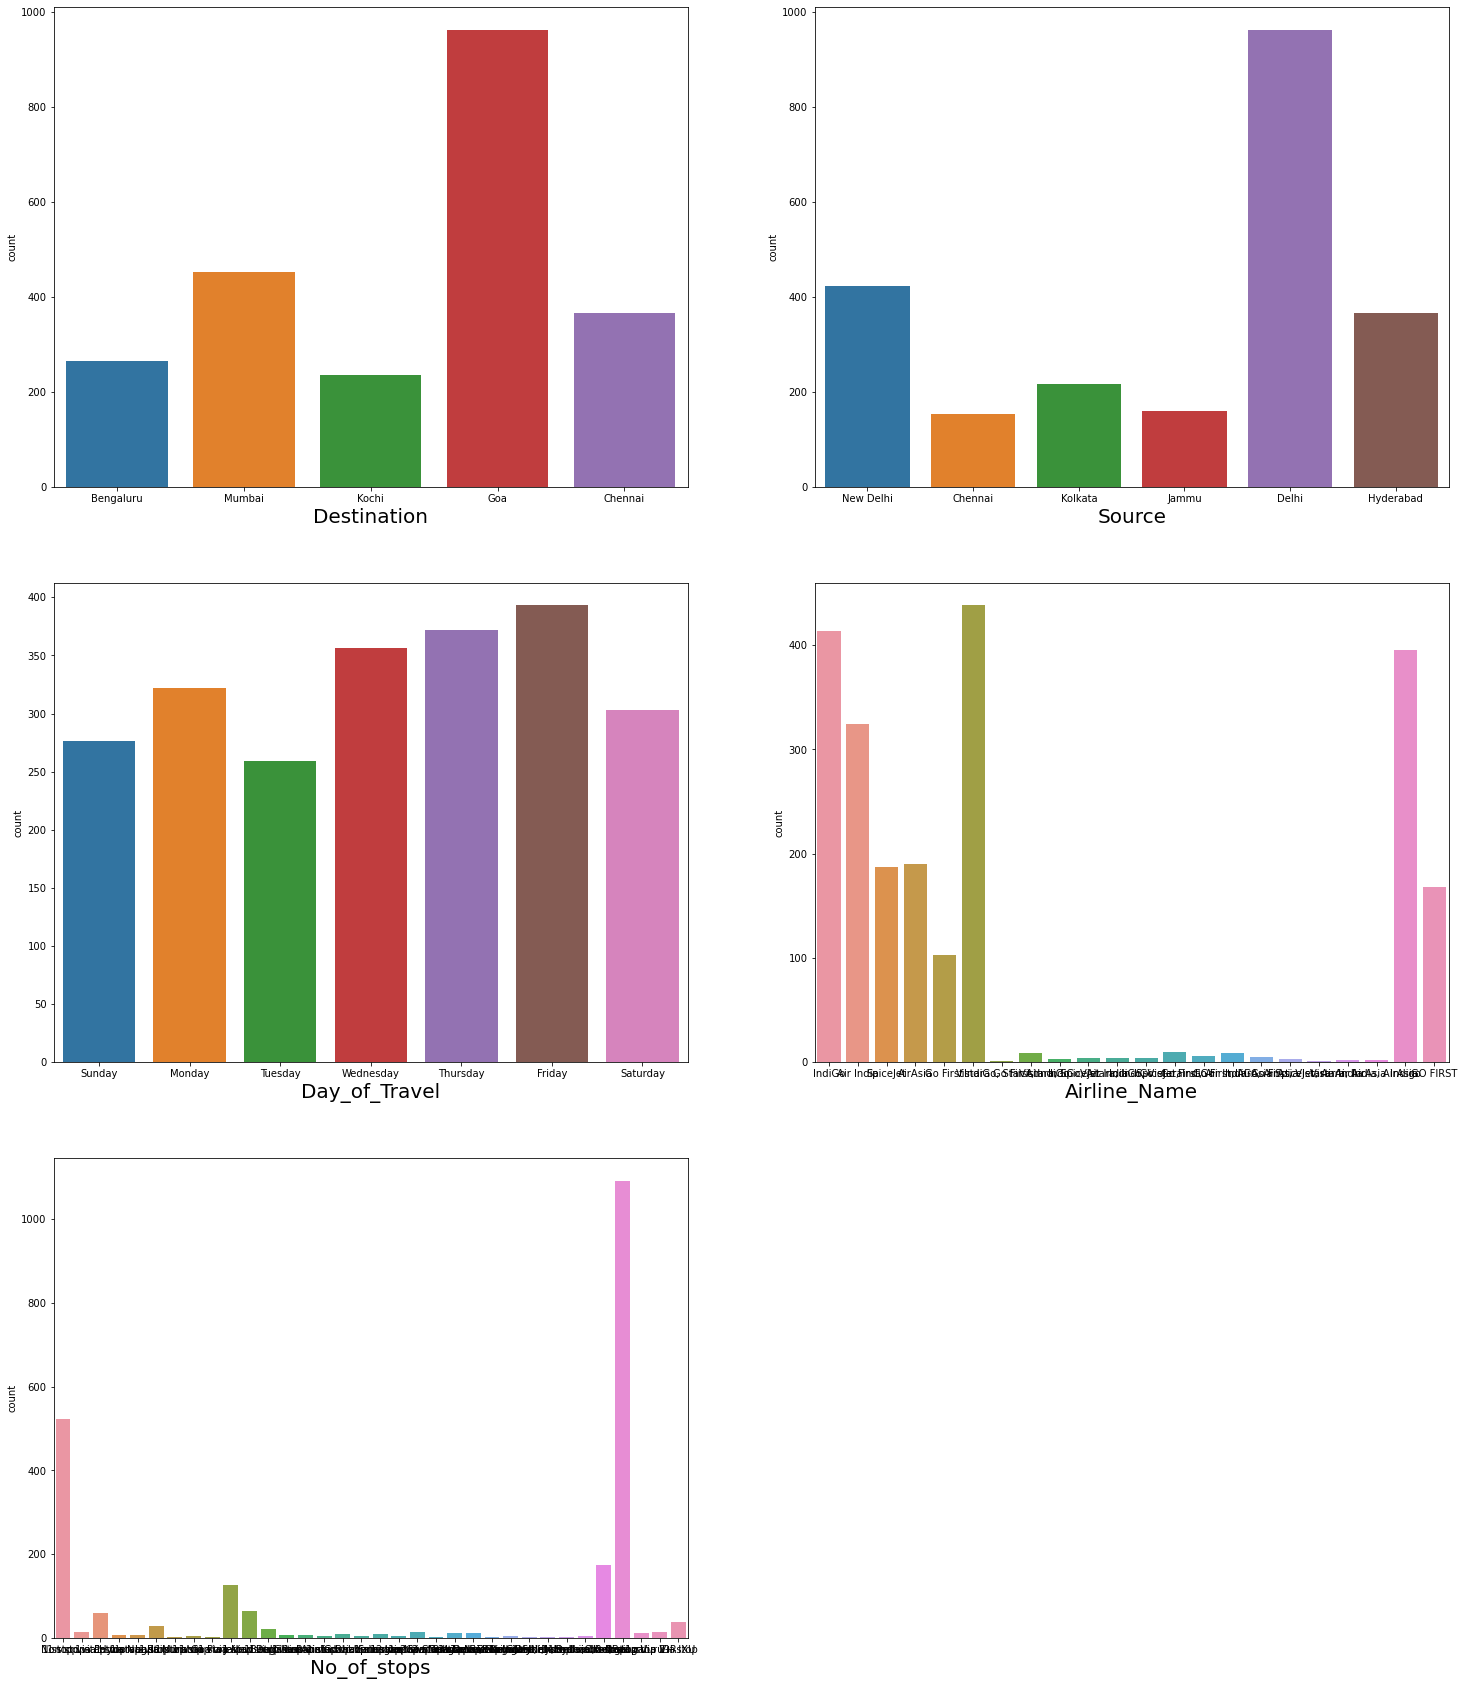

In [12]:
class_data = data[['Destination', 'Source', 'Day_of_Travel', 'Airline_Name', 'No_of_stops']]

plt.figure(figsize = (25,30), facecolor = 'white')
plotnumber = 1

for column in class_data:
    if plotnumber <= 6:
        ax =  plt.subplot(3,2,plotnumber)
        sns.countplot(x = column, data = class_data)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show


- Having Goa as the destination is more in number compared to others
- Having Delhi as source is more compared to other sources
- Day of travel data is balanced
- Airline names data is imbalanced
- No. of stops is highly imbalanced

In [13]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))
data

,Airline_Name,Departure_Time,Arrival_Time,Day_of_Travel,Source,Destination,Duration,No_of_stops,Price
0,9.0,2.0,21.0,3.0,5.0,0.0,15.0,32.0,8160
1,9.0,4.0,28.0,3.0,5.0,0.0,15.0,32.0,8160
2,9.0,15.0,43.0,3.0,5.0,0.0,14.0,32.0,8160
3,0.0,19.0,47.0,3.0,5.0,0.0,14.0,32.0,7740
4,15.0,18.0,48.0,3.0,5.0,0.0,16.0,32.0,8160
...,...,...,...,...,...,...,...,...,...
2276,18.0,65.0,168.0,0.0,2.0,1.0,172.0,28.0,19509
2277,18.0,85.0,171.0,0.0,2.0,1.0,145.0,20.0,20212
2278,18.0,43.0,142.0,0.0,2.0,1.0,172.0,20.0,20239
2279,18.0,65.0,142.0,0.0,2.0,1.0,140.0,28.0,20848


The data is encoded using ordinal encoder

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<function matplotlib.pyplot.show(close=None, block=None)>

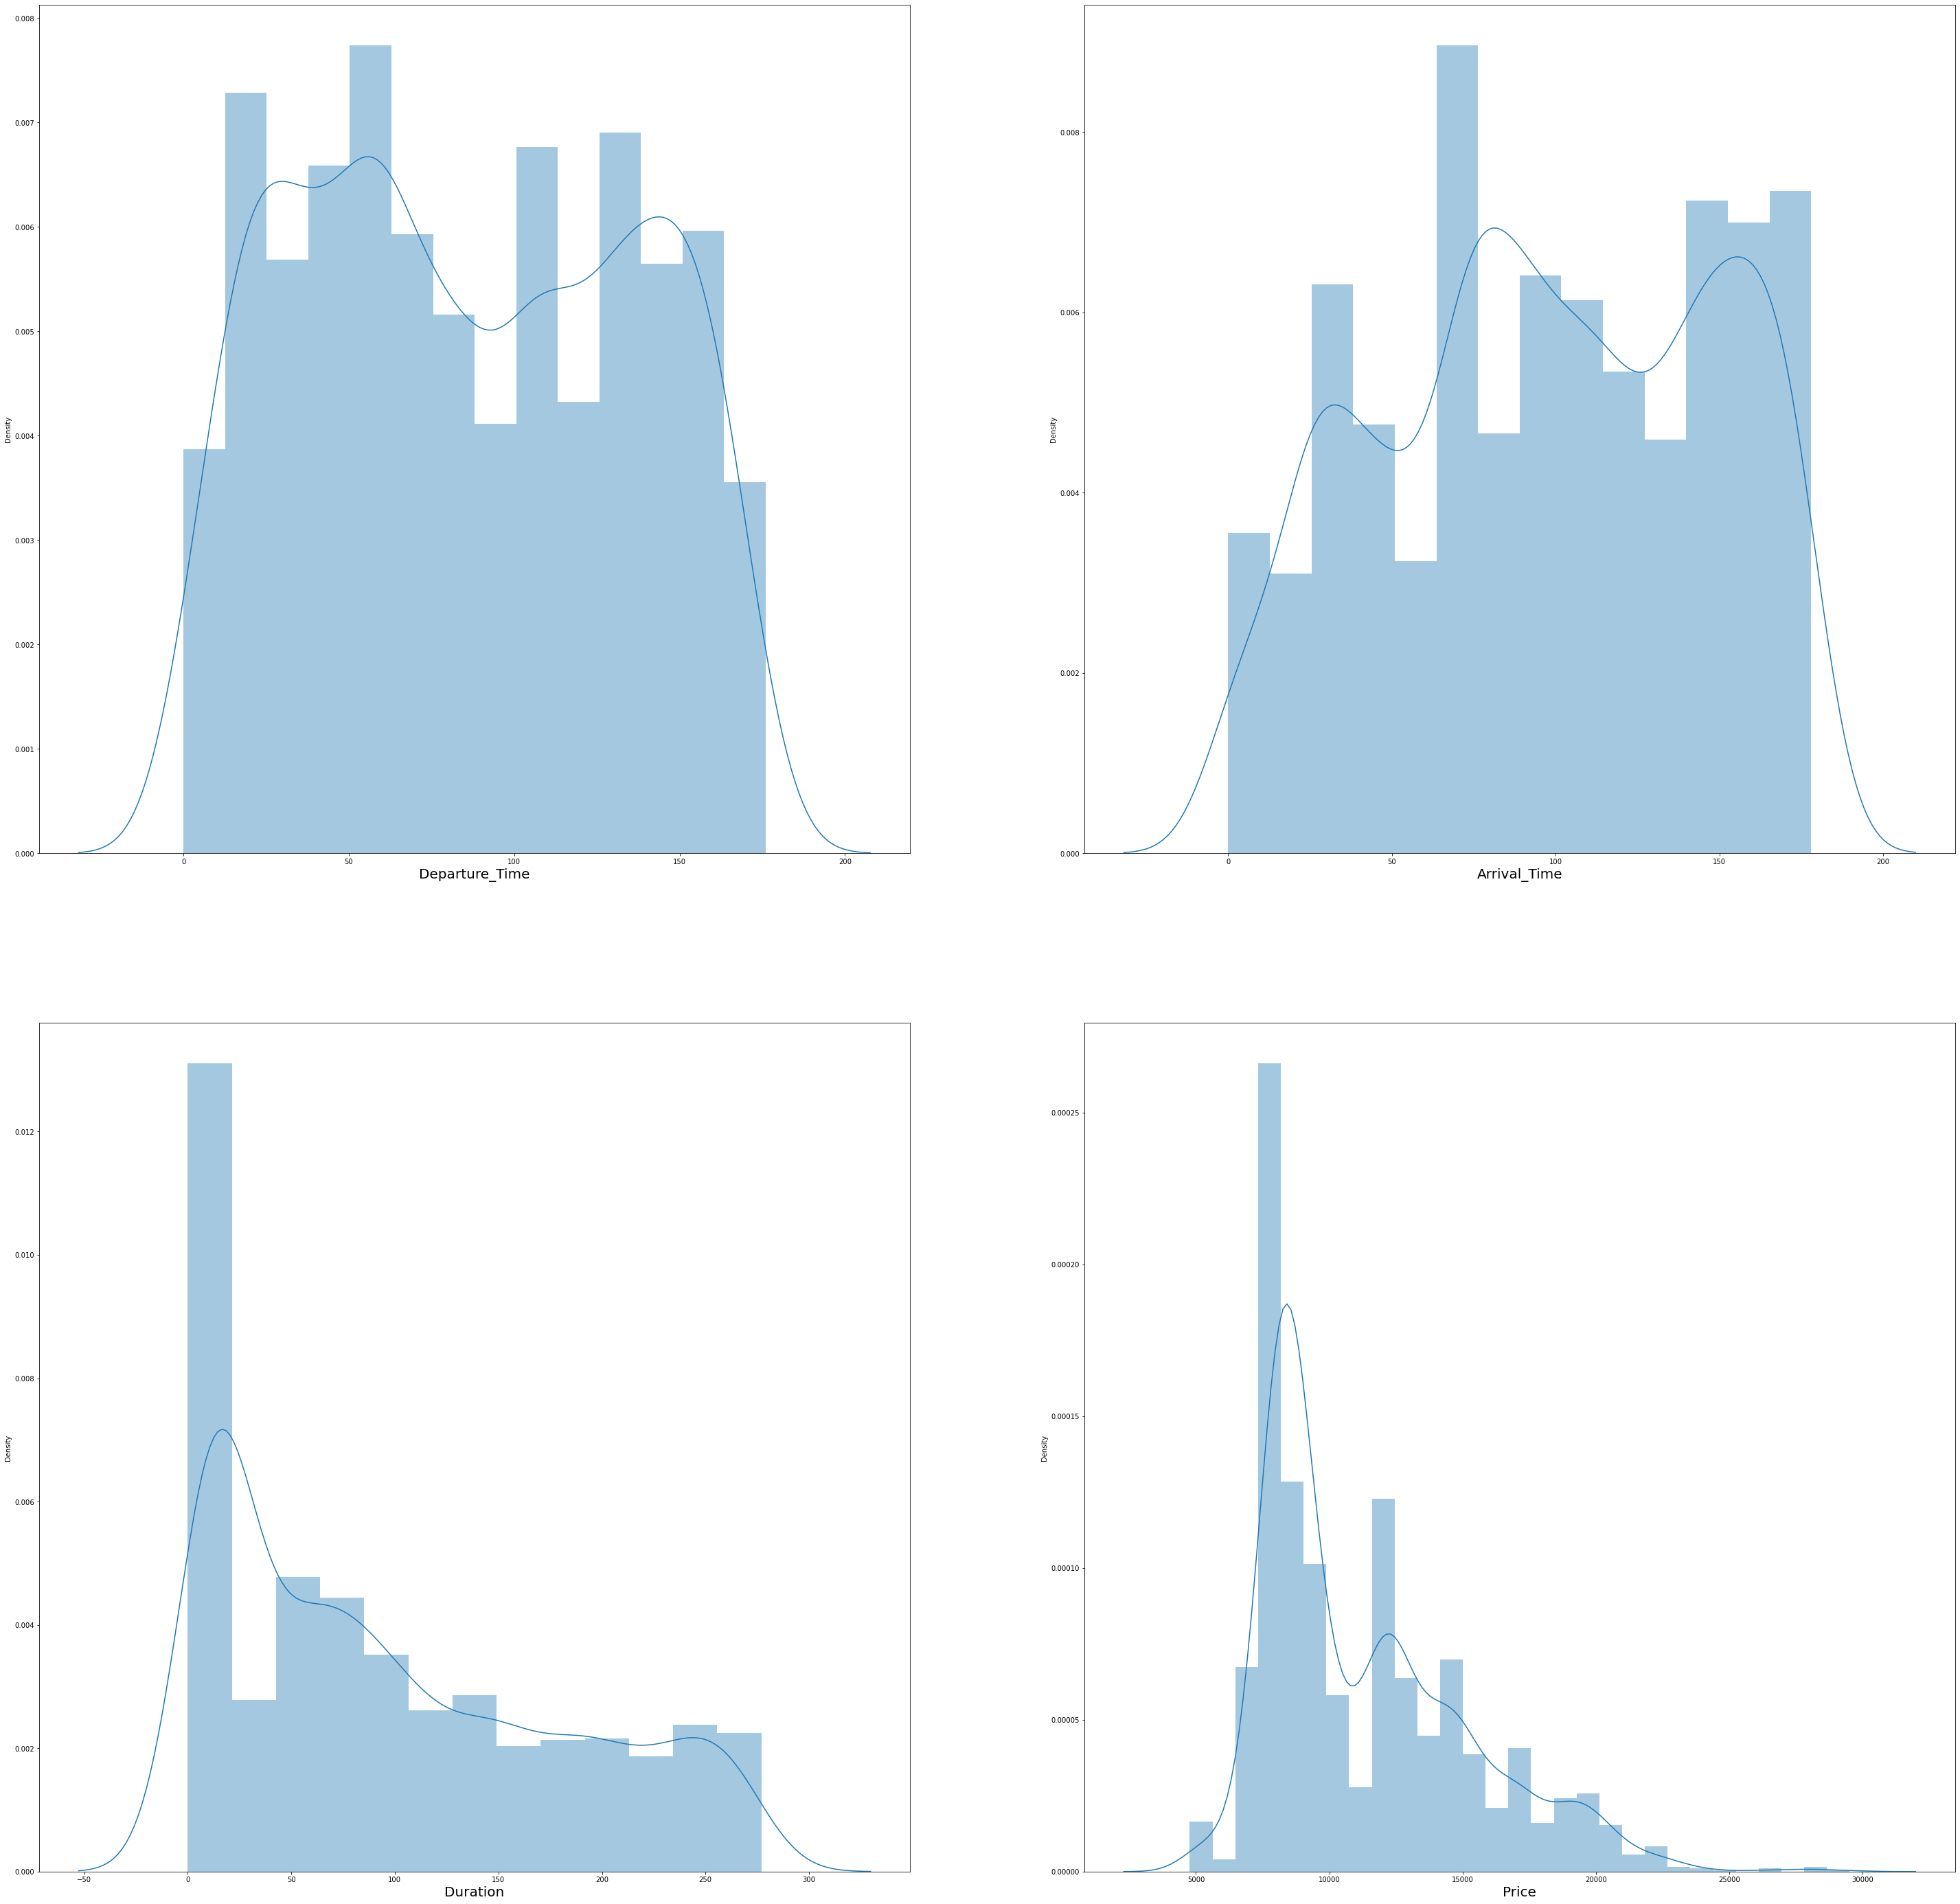

In [14]:
cont_data = data.drop(['Destination', 'Source', 'Day_of_Travel', 'Airline_Name', 'No_of_stops'],axis=1)

plt.figure(figsize = (50,50), facecolor = 'white')
plotnumber = 1

for column in cont_data:
    if plotnumber <= 4:
        ax =  plt.subplot(2,2,plotnumber)
        sns.distplot(cont_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

All the variables have a standardised curve. Check for outliers also.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

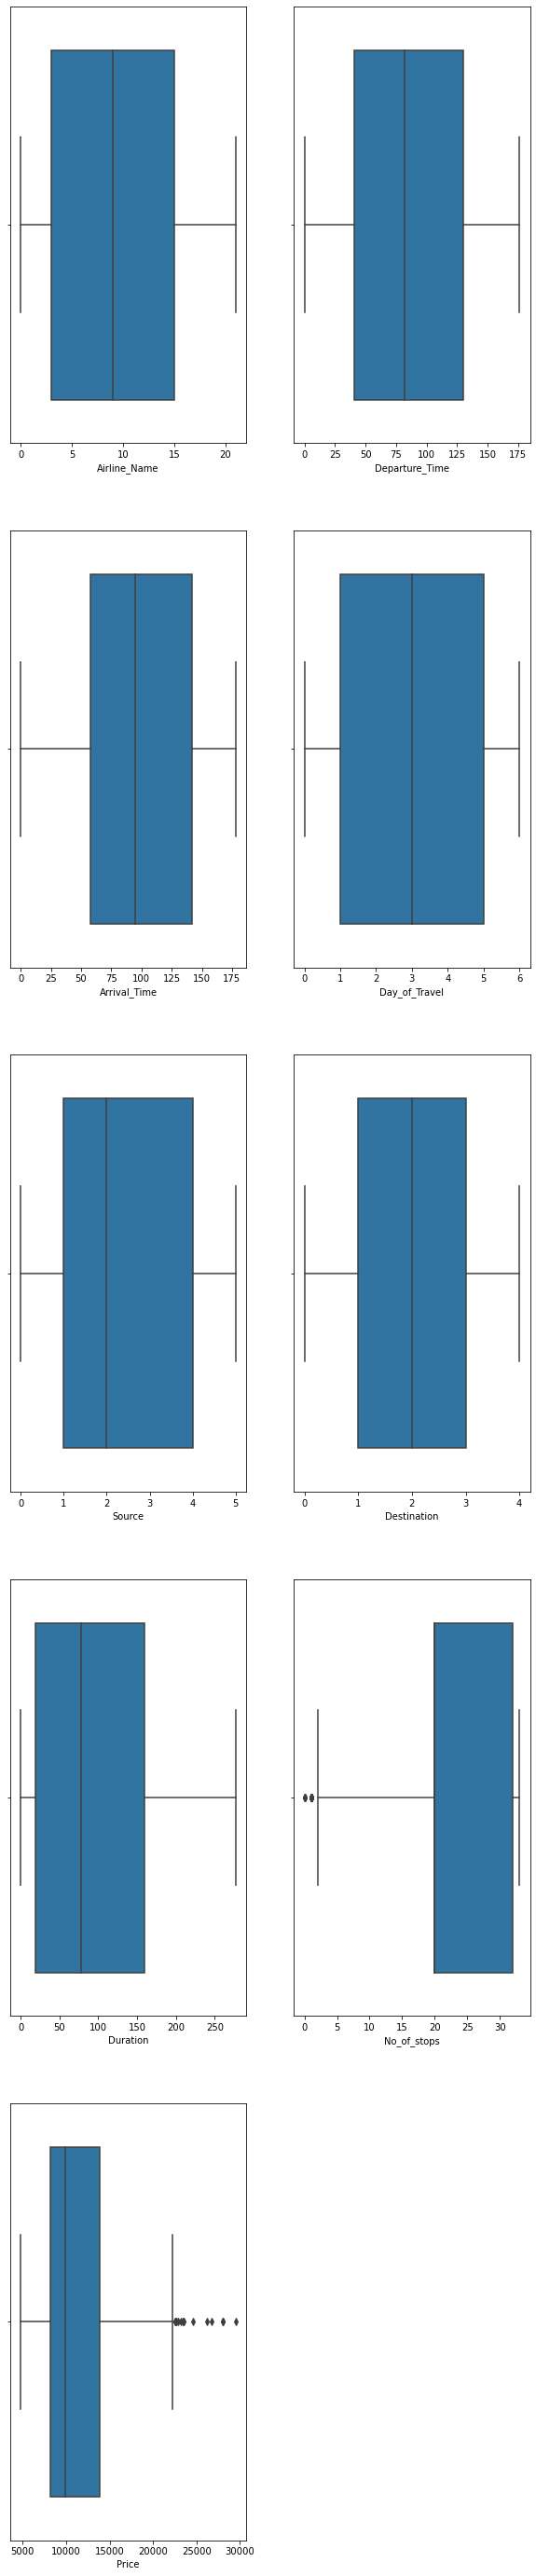

In [15]:
plt.figure(figsize=(10,50))
graph = 1
for column in data:
    if graph<= 10:
        ax = plt.subplot(5,2,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

Outliers is present in no. of stops and price only

In [16]:
z = np.abs(zscore(data))
data_new = data[(z<3).all(axis=1)]
print('Before removing outlier', data.shape)
print('After removing outlier', data_new.shape)

Before removing outlier (2281, 9)
After removing outlier (2270, 9)


Keeping maximum threshold as 3, outliers are removed

In [17]:
Data_loss = ((2281-2270)/2281)*100
Data_loss

0.48224462954844366

Less than 1% is the data loss

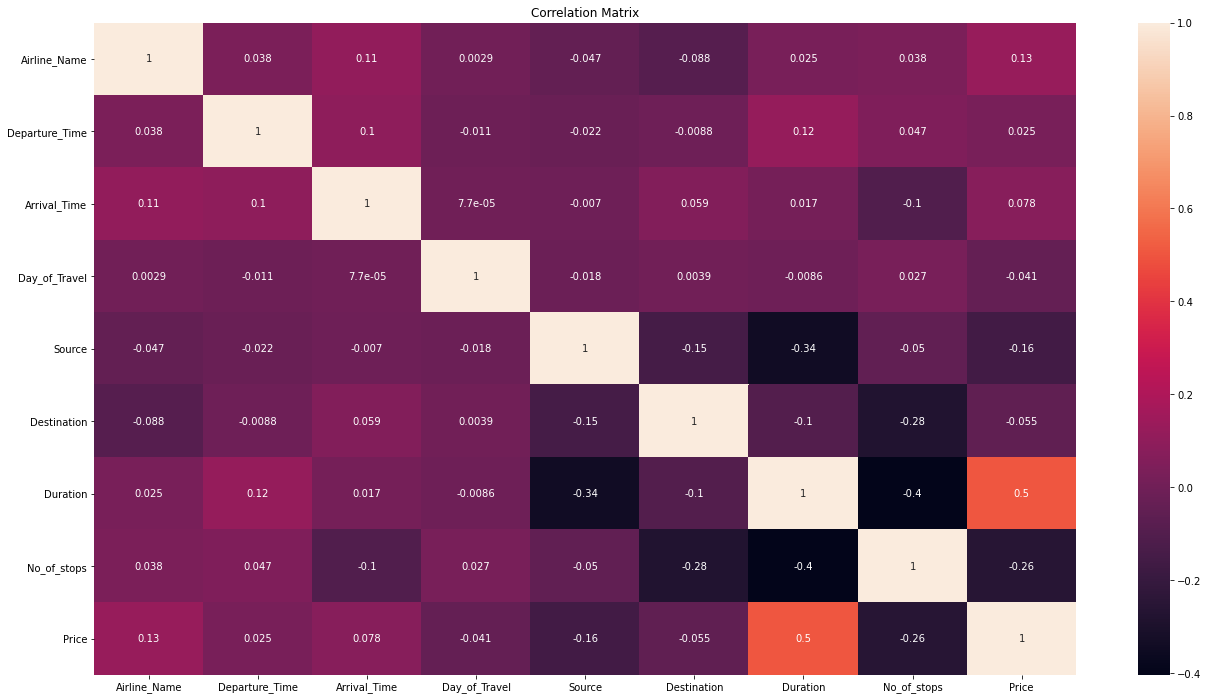

In [18]:
corr_mat = data_new.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

There is no correlation between variables

## Data Manipulation

In [19]:
x = data_new.drop('Price',axis=1)
y = data_new['Price']

Separated the labels and target

In [20]:
x.skew().sort_values(ascending=False)

Source            0.607102
Duration          0.606653
Departure_Time    0.070871
Destination       0.064495
Day_of_Travel     0.037242
Arrival_Time     -0.130483
Airline_Name     -0.168563
No_of_stops      -0.457215
dtype: float64

There is a no skewness in the data, need not treat it

In [21]:
x_scaled = scaler.fit_transform(x)

Since there is different range of data, scale the data using Standard Scalar

## Feature Selection

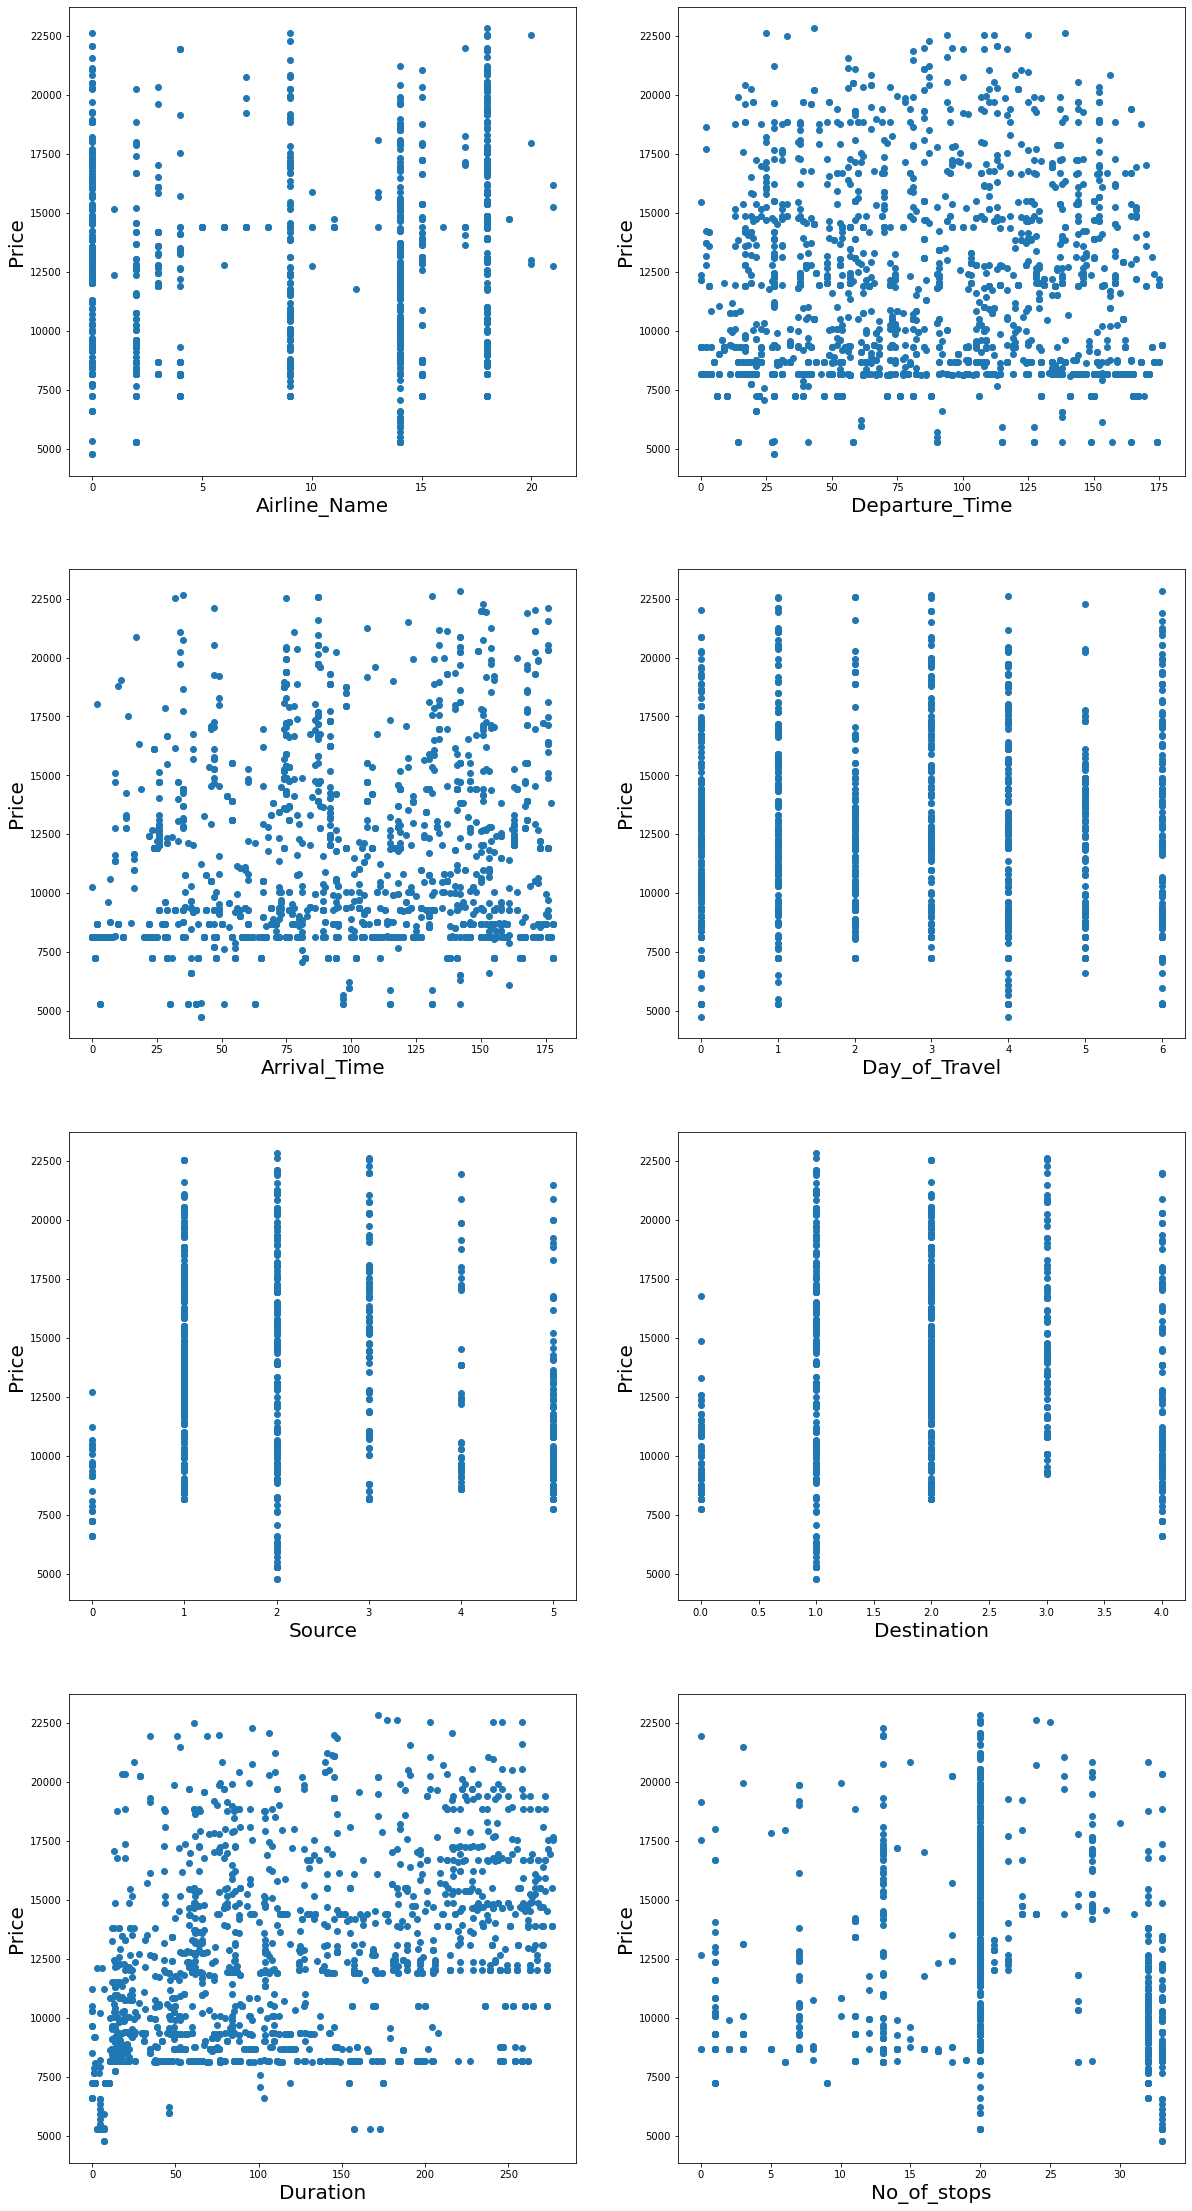

In [22]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Price', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship between the labels and target looks fairly linear

In [23]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor (x_scaled,i)for i in range (x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.026527,Airline_Name
1,1.046314,Departure_Time
2,1.038650,Arrival_Time
3,1.001265,Day_of_Travel
4,1.310910,Source
5,1.279003,Destination
6,1.651133,Duration
7,1.551032,No_of_stops


There is no collinearity found.

## Model Building

In [24]:
maxreg = 0 
maxrs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.05, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxreg:
        maxreg = acc
        maxrs = i
print('Best regression score is:',maxreg,'on Random State',maxrs)

Best regression score is: 0.4375822990225834 on Random State 28


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.05, random_state = 28)

### Linear Regression

In [26]:
LR = LinearRegression()
LR.fit(x_train,y_train)
lr = LR.score(x_test,y_test)
print('Regression Score:',lr)

y_pred = LR.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.4375822990225834
Mean Absolute Error: 2067.00381033516
Mean Squared Error: 7076547.97315227


### Decision Tree Regressor

In [27]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dtt = dt.score(x_test,y_test)
print('Regression Score:',dtt)

y_pred = dt.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.6182901914339183
Mean Absolute Error: 948.1535087719299
Mean Squared Error: 4802814.291666667


### Random Forest Regressor

In [28]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_ = rfr.score(x_test,y_test)
print('Regression Score:',rfr_)

y_pred_rfr = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_rfr)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred_rfr)
print('Mean Squared Error:',mse)

Regression Score: 0.7548093868703247
Mean Absolute Error: 886.661447368421
Mean Squared Error: 3085079.174007785


### KNeighborsRegressor

In [29]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_ = knn.score(x_test,y_test)
print('Regression Score:',knn_)

y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.45361373088416745
Mean Absolute Error: 886.661447368421
Mean Squared Error: 3085079.174007785


### SVR

In [30]:
sv = SVR()
sv.fit(x_train,y_train)
sv_ = sv.score(x_test,y_test)
print('Regression Score:',sv_)

y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)
SVR

Regression Score: -0.08339580749044462
Mean Absolute Error: 886.661447368421
Mean Squared Error: 3085079.174007785


sklearn.svm._classes.SVR

Random Forest Regressor has 74% regression score

Regression score
- Linear Regression       - 0.35
- Decision tree           - 0.61
- Random Forest Regressor - 0.74
- KNeighbors Regressor    - 0.52
- SVR                     - -0.05

## Cross Validation

In [31]:
sc = cross_val_score(LR,x,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rfr,x,y,cv=5)
print('RFR cvs:',sc2.mean())

sc3 = cross_val_score(knn,x,y,cv=5)
print('KNN cvs:',sc3.mean())

sc4 = cross_val_score(sv,x,y,cv=5)
print('SVR cvs:',sc4.mean())

LR cvs: -0.008311864234317401
DT cvs: -0.3733917513155976
RFR cvs: 0.05655654098301473
KNN cvs: 0.043044346500665444
SVR cvs: -0.7997134287503472


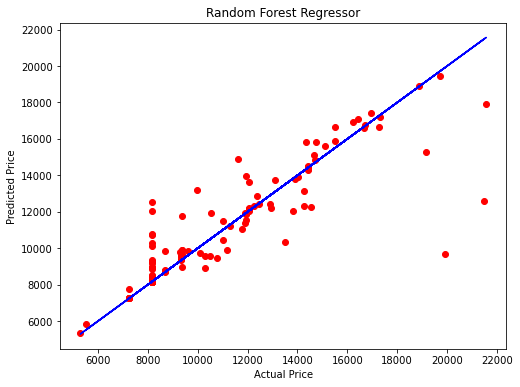

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred_rfr,color='r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regressor')
plt.show()

## Regularisation

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

clf.best_params_

{'alpha': 10, 'random_state': 0}

In [34]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.4375823057528824

In [35]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

-0.008311845575130983

## Hyperparameter Tuning

In [36]:
params = {'bootstrap': [True, False],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10],'max_features':['auto', 'sqrt', ],'n_estimators': [20,30,40,50,60,70,80,90,100],'random_state' : [28]} 
rnd_search = RandomizedSearchCV (estimator = rfr, cv = 5, param_distributions = params,n_iter = 10,n_jobs=1)
print(rnd_search.fit(x_train,y_train))
print('Best Estimator:', rnd_search.best_estimator_)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 30, 40, 50, 60, 70,
                                                         80, 90, 100],
                                        'random_state': [28]})
Best Estimator: RandomForestRegressor(min_samples_split=5, n_estimators=40, random_state=28)


In [37]:
rf = RandomForestRegressor(min_samples_leaf=4, n_estimators=80, random_state=28)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

Accuracy post tuning
0.7134765757587309


Accuracy post tuning is increased to 0.71. So, we can use the same to train and test the model